In [57]:
import numpy as np
#import matplotlib
#matplotlib.use('Agg');
import matplotlib.pyplot as plt
#plt.set_cmap('jet');
import random, os, sys, pandas, os, pickle
import argparse
from textwrap import wrap
%matplotlib inline
import glob

In [58]:
##############################################
##############################################
##############################################
##############################################
## below is code to plot the results of running this with "run.sh classify.ipynb"
## e.g "run.sh classify.ipynb -thing -nsamples 32 -seed 4"
## it writes a pickle file with the results for each run.


In [59]:
#glob.glob("../logs/*/*/*.pkl")

In [73]:
ddf = pandas.DataFrame()
for f in glob.glob("../logs/best/*/*/*.pkl"):
    d = (pickle.load(open(f,"rb")))
    ddf = ddf.append(pandas.DataFrame(d))

In [74]:
df = ddf.copy()

In [75]:
df.shape

(300, 42)

In [54]:
df.columns

Index(['batch_size', 'best_testauc_for_validauc', 'conditional_reg', 'cuda',
       'epoch', 'manager', 'manager_name', 'manager_uri', 'model',
       'model_flat_layer', 'num_epochs', 'optimizer', 'optimizer_lr',
       'penalise_grad', 'penalise_grad_lambda_1', 'penalise_grad_lambda_2',
       'penalise_grad_usemasks', 'seed', 'shuffle', 'skopt', 'test_dataset',
       'test_dataset_blur', 'test_dataset_maxmasks', 'test_dataset_mode',
       'test_dataset_nsamples', 'test_dataset_seed', 'testauc',
       'train_dataset', 'train_dataset_blur', 'train_dataset_maxmasks',
       'train_dataset_mode', 'train_dataset_nsamples', 'train_dataset_seed',
       'trainloss', 'transform', 'valid_dataset', 'valid_dataset_blur',
       'valid_dataset_maxmasks', 'valid_dataset_mode',
       'valid_dataset_nsamples', 'valid_dataset_seed', 'validauc'],
      dtype='object')

In [55]:
# del df["optimizer"]
# del df["train_dataset_blur"]
del df["model_flat_layer"]
del df["transform"]
del df["cuda"]

In [11]:
for i in df.columns:
    if "valid_dataset" in i:
        print (i)
        del df[i]
    if "test_dataset" in i:
        print (i)
        del df[i]
    if "train_dataset_" in i:
        print(i)
        del df[i]

test_dataset
test_dataset_blur
test_dataset_maxmasks
test_dataset_mode
test_dataset_nsamples
test_dataset_seed
train_dataset_blur
train_dataset_maxmasks
train_dataset_mode
train_dataset_nsamples
train_dataset_seed
valid_dataset
valid_dataset_blur
valid_dataset_maxmasks
valid_dataset_mode
valid_dataset_nsamples
valid_dataset_seed


In [20]:
df.head(10)

,batch_size,best_testauc_for_validauc,conditional_reg,cuda,epoch,manager,manager_name,manager_uri,model,model_flat_layer,...,train_dataset_seed,trainloss,transform,valid_dataset,valid_dataset_blur,valid_dataset_maxmasks,valid_dataset_mode,valid_dataset_nsamples,valid_dataset_seed,validauc
0,32,0.542969,0,True,0,set_experiment,exploration_1,NaN,SimpleCNN,200,...,1234,1.866161e+10,valid,LungMSDDataset,8,54,valid,256,1234,0.503906
1,32,0.542969,0,True,1,set_experiment,exploration_1,NaN,SimpleCNN,200,...,1234,5.217141e+09,valid,LungMSDDataset,8,54,valid,256,1234,0.468750
2,32,0.617188,0,True,2,set_experiment,exploration_1,NaN,SimpleCNN,200,...,1234,4.723449e+09,valid,LungMSDDataset,8,54,valid,256,1234,0.593750
3,32,0.667969,0,True,3,set_experiment,exploration_1,NaN,SimpleCNN,200,...,1234,4.258062e+09,valid,LungMSDDataset,8,54,valid,256,1234,0.601562
4,32,0.679688,0,True,4,set_experiment,exploration_1,NaN,SimpleCNN,200,...,1234,3.027794e+09,valid,LungMSDDataset,8,54,valid,256,1234,0.656250
5,32,0.703125,0,True,5,set_experiment,exploration_1,NaN,SimpleCNN,200,...,1234,2.983549e+09,valid,LungMSDDataset,8,54,valid,256,1234,0.683594
6,32,0.703125,0,True,6,set_experiment,exploration_1,NaN,SimpleCNN,200,...,1234,2.468878e+09,valid,LungMSDDataset,8,54,valid,256,1234,0.628906
7,32,0.703125,0,True,7,set_experiment,exploration_1,NaN,SimpleCNN,200,...,1234,3.018557e+09,valid,LungMSDDataset,8,54,valid,256,1234,0.617188
8,32,0.703125,0,True,8,set_experiment,exploration_1,NaN,SimpleCNN,200,...,1234,2.547907e+09,valid,LungMSDDataset,8,54,valid,256,1234,0.675781
9,32,0.710938,0,True,9,set_experiment,exploration_1,NaN,SimpleCNN,200,...,1234,2.586654e+09,valid,LungMSDDataset,8,54,valid,256,1234,0.691406


In [37]:
print (df.train_dataset.unique())
print (df.penalise_grad.unique())
print (df.train_dataset_nsamples.unique())
print (df.train_dataset_maxmasks.unique())
print (df.optimizer_lr.unique())

['LungMSDDataset']
['diff_from_ref' 'contrast']
[185  86 225 149 137]
[19 59 58 50]
[0.0002 0.0055 0.0001 0.0012 0.0015]


In [113]:
df = df[(df.nsamples == 64) & (df.optimizer_lr==0.0001)]

In [78]:
df.head(10)

,batch_size,best_testauc_for_validauc,conditional_reg,cuda,epoch,manager,manager_name,manager_uri,model,model_flat_layer,...,train_dataset_seed,trainloss,transform,valid_dataset,valid_dataset_blur,valid_dataset_maxmasks,valid_dataset_mode,valid_dataset_nsamples,valid_dataset_seed,validauc
0,32,0.621094,1,True,0,set_tracking_uri,NaN,,SimpleCNN,200,...,1234,4.823779,test,LungMSDDataset,3,21,valid,256,1234,0.554688
1,32,0.652344,1,True,1,set_tracking_uri,NaN,,SimpleCNN,200,...,1234,1.289771,test,LungMSDDataset,3,21,valid,256,1234,0.683594
2,32,0.652344,1,True,2,set_tracking_uri,NaN,,SimpleCNN,200,...,1234,0.859646,test,LungMSDDataset,3,21,valid,256,1234,0.546875
3,32,0.652344,1,True,3,set_tracking_uri,NaN,,SimpleCNN,200,...,1234,0.766682,test,LungMSDDataset,3,21,valid,256,1234,0.558594
4,32,0.652344,1,True,4,set_tracking_uri,NaN,,SimpleCNN,200,...,1234,0.761300,test,LungMSDDataset,3,21,valid,256,1234,0.578125
5,32,0.652344,1,True,5,set_tracking_uri,NaN,,SimpleCNN,200,...,1234,0.713961,test,LungMSDDataset,3,21,valid,256,1234,0.609375
6,32,0.757812,1,True,6,set_tracking_uri,NaN,,SimpleCNN,200,...,1234,0.700621,test,LungMSDDataset,3,21,valid,256,1234,0.710938
7,32,0.757812,1,True,7,set_tracking_uri,NaN,,SimpleCNN,200,...,1234,0.675339,test,LungMSDDataset,3,21,valid,256,1234,0.671875
8,32,0.757812,1,True,8,set_tracking_uri,NaN,,SimpleCNN,200,...,1234,0.650097,test,LungMSDDataset,3,21,valid,256,1234,0.687500
9,32,0.757812,1,True,9,set_tracking_uri,NaN,,SimpleCNN,200,...,1234,0.647614,test,LungMSDDataset,3,21,valid,256,1234,0.726562


In [115]:
#df[(df.nsamples == 64)]


In [77]:
df[(df.epoch==99)].groupby(["penalise_grad","conditional_reg","epoch", "seed"]).mean()

,,,,batch_size,best_testauc_for_validauc,cuda,model_flat_layer,num_epochs,optimizer_lr,penalise_grad_lambda_1,penalise_grad_lambda_2,penalise_grad_usemasks,shuffle,...,train_dataset_blur,train_dataset_maxmasks,train_dataset_nsamples,train_dataset_seed,trainloss,valid_dataset_blur,valid_dataset_maxmasks,valid_dataset_nsamples,valid_dataset_seed,validauc
penalise_grad,conditional_reg,epoch,seed,,,,,,,,,,,,,,,,,,,,,
False,0,99,1234,32,0.726562,True,200,100,0.0010,4.3460,0.6792,0,True,...,2,11,171,1234,4.553747e-01,10,45,256,1234,0.726562
contrast,1,99,1234,32,0.710938,True,200,100,0.0015,2.7949,9.8016,1,True,...,8,50,137,1234,4.835222e-01,3,21,256,1234,0.792969
diff_from_ref,1,99,1234,32,0.648438,True,200,100,0.0012,1.3357,6.6690,1,True,...,7,58,149,1234,2.589162e+08,7,15,256,1234,0.777344


In [79]:
df[(df.epoch==99)].groupby(["penalise_grad"])[["best_testauc_for_validauc"]].count()

,best_testauc_for_validauc
penalise_grad,
False,1
contrast,1
diff_from_ref,1


In [80]:
qq = df[(df.epoch==99)].groupby(["penalise_grad", "conditional_reg"])[["best_testauc_for_validauc"]]
q = qq.mean().join(qq.std(),rsuffix='_std')
q = q.join(qq.count(),rsuffix='_count')
q

,,best_testauc_for_validauc,best_testauc_for_validauc_std,best_testauc_for_validauc_count
penalise_grad,conditional_reg,,,
False,0,0.726562,NaN,1
contrast,1,0.710938,NaN,1
diff_from_ref,1,0.648438,NaN,1


IndexError: Column(s) ['best_testauc_for_validauc'] already selected

In [872]:
#subsetdata[subsetdata.penalise_grad == "diff_from_ref"].groupby("seed").count()

False num trials 1
contrast num trials 1
diff_from_ref num trials 1


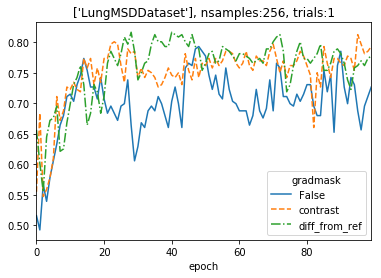

In [81]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df.reindex()
for k,i in enumerate(sorted(subsetdata.penalise_grad.unique())):

    thisdata = subsetdata[subsetdata.penalise_grad == i]
    willplot = thisdata.groupby(["epoch"]).mean()
    r = willplot.plot(y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="gradmask")
#plt.ylim(.5, 0.85);
#plt.xlim(0,500);

plt.title(str(subsetdata.train_dataset.unique()) + ", nsamples:" + str(thisdata.test_dataset_nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));


0 num trials 1
1 num trials 2


AttributeError: 'DataFrame' object has no attribute 'nsamples'

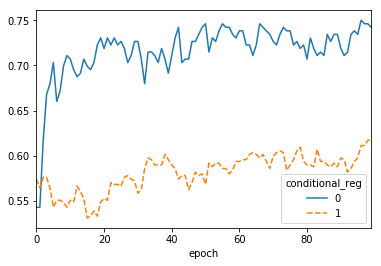

In [69]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[df.penalise_grad=="diff_from_ref"].reindex()
for k,i in enumerate(sorted(subsetdata.conditional_reg.unique())):

    thisdata = subsetdata[subsetdata.conditional_reg == i]
    willplot = thisdata.groupby(["epoch"]).mean()
    r = willplot.plot(y="testauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="conditional_reg")
#plt.ylim(.5, 0.85);
#plt.xlim(0,500);

plt.title(str(subsetdata.train_dataset.unique()) + ", nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));


In [623]:
#"num trials", subsetdata[subsetdata.thing == False].groupby(["epoch"]).count()

AttributeError: 'DataFrame' object has no attribute 'maskblur'

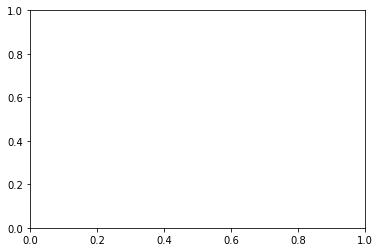

In [402]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 32) & 
              (df.maskblur == 3) & 
              (df.batchsize == 16) & 
              (df.annealinglambda == 1.0) & 
              (df.thingstyle == 1.0) & 
              (df.epoch < 800) &
              (df.dataset == "tnt")].reindex()
for k,i in enumerate(sorted(subsetdata.maxmasks.unique())):

    thisdata = subsetdata[subsetdata.maxmasks == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="# masks used")
plt.ylim(.55, 0.81);
#plt.xlim(0,500);

params = subsetdata.drop(["trainloss", "validauc", "seed", "epoch"], axis=1).iloc[0].to_dict()
params = "\n".join(wrap(str(params), 60))
plt.title(str(params) + ", trials:" + str(thisdata.seed.unique().shape[0]));


AttributeError: 'DataFrame' object has no attribute 'thing'

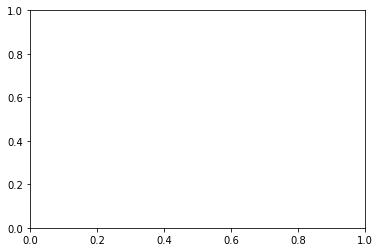

In [403]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 32) & 
              (df.thing == True) & 
              (df.maskblur == 2) & 
              (df.annealinglambda == 1.0) & 
              (df.dataset == "lung")].reindex()
for k,i in enumerate(sorted(subsetdata.maxmasks.unique())):

    thisdata = subsetdata[subsetdata.maxmasks == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="# masks used")
#plt.ylim(.65, 0.81);
plt.xlim(0,500);

plt.title("Vary maxmasks used, nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));


AttributeError: 'DataFrame' object has no attribute 'thing'

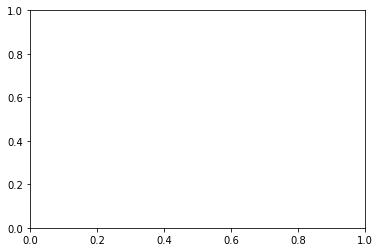

In [404]:
fig, ax = plt.subplots()
ls = ['solid', 'dashed', 'dashdot', 'dotted', '-' ,'--' ,'-.' , ':','None' ,' ' ,'' ]

subsetdata = df[(df.nsamples == 64) & 
              (df.thing == True) & 
              (df.maskblur == 3) & 
              (df.maxmasks == 64) & 
              (df.dataset == "lung")].reindex()
for k,i in enumerate(sorted(subsetdata.annealinglambda.unique())):

    thisdata = subsetdata[subsetdata.annealinglambda == i]
    r = thisdata.groupby(["epoch"]).mean().plot(
        y="validauc", ax=ax, label=str(i), ls=ls[k])
    print (i, "num trials", thisdata.groupby(["epoch"]).count().min()[0])
    plt.legend(title="annealinglambda")
#plt.ylim(.65, 0.85);
#plt.xlim(0,600);

plt.title("Vary annealinglambda, nsamples:" + str(thisdata.nsamples.unique()[0]) + 
          ", trials:" + str(thisdata.seed.unique().shape[0]));
